In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import pymc3 as pm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [89]:
df = pd.read_csv('BTP_4.csv')
df.shape

(252, 7)

In [90]:
df.sample(5)

,Surface Tension,Contact Angle,viscosity,TA,AW,TL,FL
240,23.17,21.80,17.12,60.2,36.6,13.11,7.5
210,22.87,11.20,12.57,71.2,39.5,15.60,9.8
194,29.09,16.00,13.44,41.6,26.1,11.50,6.7
90,25.40,19.76,18.54,46.0,27.1,9.70,5.1
136,26.20,18.31,12.30,101.2,38.0,28.00,21.6


In [91]:
df.isnull().sum()

Surface Tension    0
Contact Angle      0
viscosity          0
TA                 0
AW                 0
TL                 0
FL                 0
dtype: int64

In [92]:
features_input = np.array(['Surface Tension','Contact Angle','viscosity'])
features_output = np.array(['TA','AW','TL','FL'])

### Linear Regression

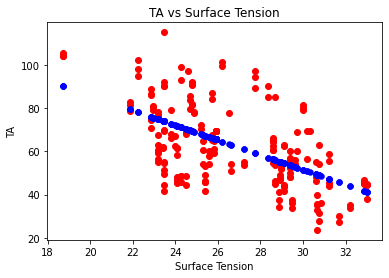

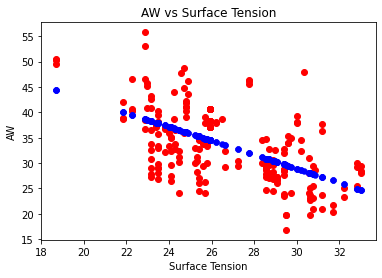

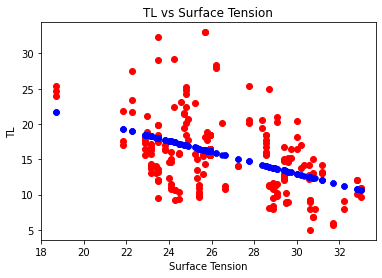

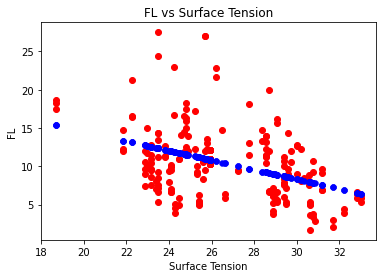

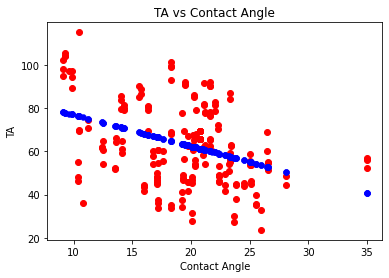

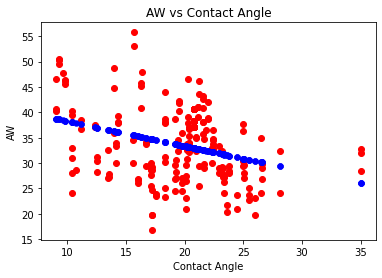

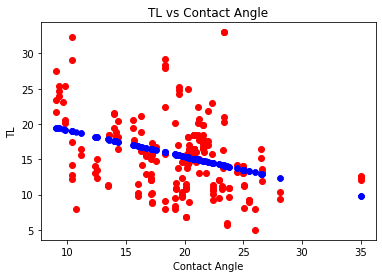

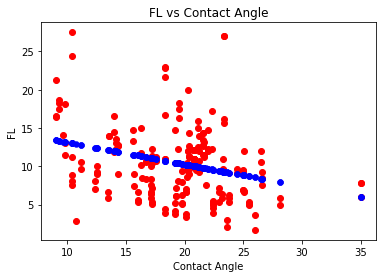

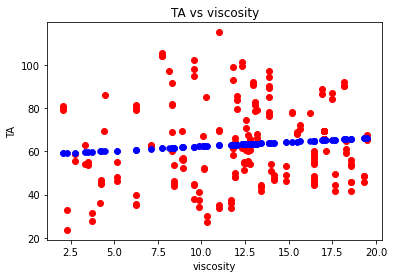

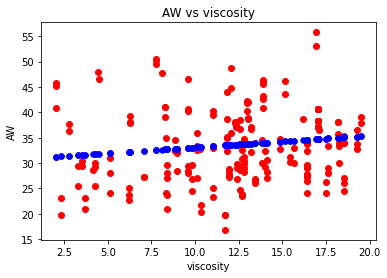

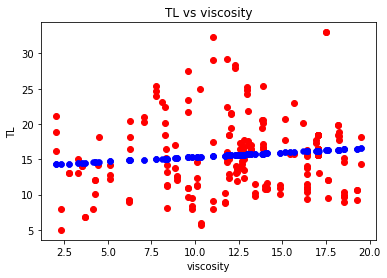

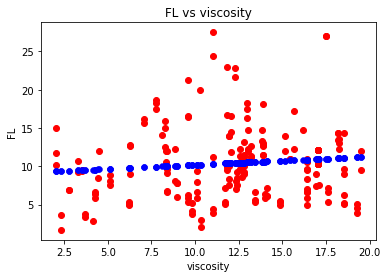

In [93]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        model = LinearRegression()

        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])


        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train


        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue',linewidth=0.4)
        plt.title(y+' vs '+x)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        
        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [94]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,221.460084,11.666889,14.822318,0.289957
1,Surface Tension vs AW,36.622920,4.857700,6.023288,0.297989
2,Surface Tension vs TL,22.228741,3.616996,4.710317,0.166745
3,Surface Tension vs FL,19.116006,3.227546,4.365274,0.117363
4,Contact Angle vs TA,288.438738,13.656779,16.963579,0.072158
5,Contact Angle vs AW,48.651545,5.815346,6.963686,0.061706
6,Contact Angle vs TL,25.501055,3.779228,5.046189,0.041894
7,Contact Angle vs FL,21.332400,3.408172,4.613065,0.013594
8,viscosity vs TA,321.615067,14.103312,17.876579,-0.020711
9,viscosity vs AW,53.157873,5.888827,7.281881,-0.023242


### Polynomial regression

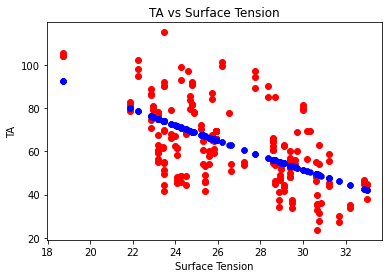

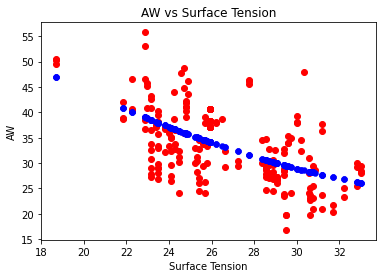

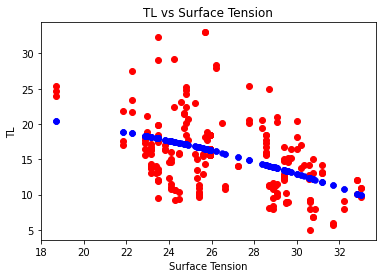

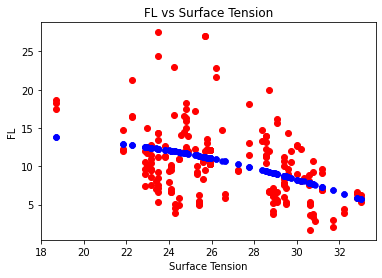

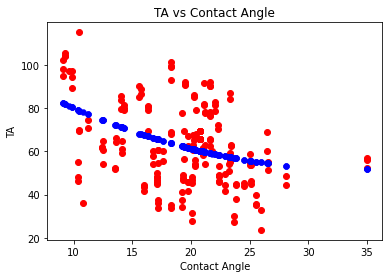

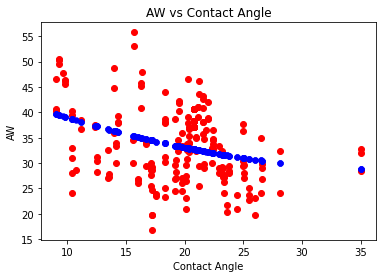

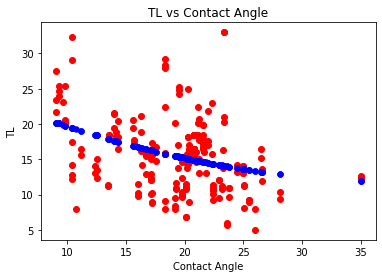

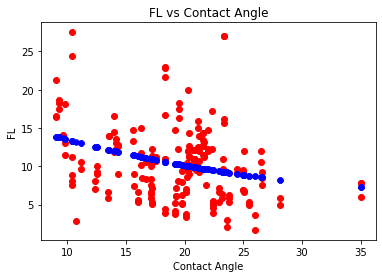

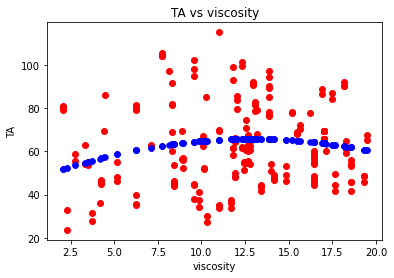

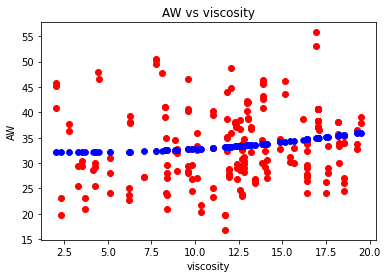

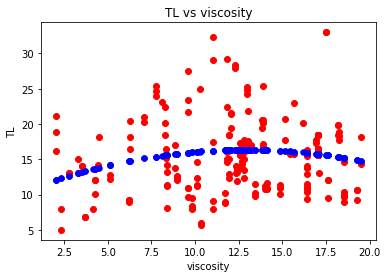

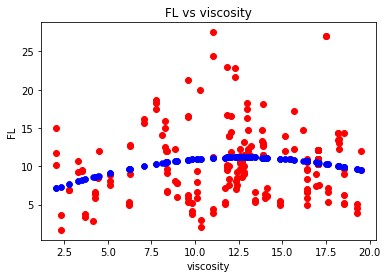

In [95]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])
degree = 2

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        poly = PolynomialFeatures(degree=degree)

        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])

        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])

            X_train_poly = poly.fit_transform(x_train)
            X_test_poly = poly.transform(x_test)

            model = LinearRegression()
            model.fit(X_train_poly, y_train)

            y_pred = model.predict(X_test_poly)
            y_pred_train = model.predict(X_train_poly)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train

        
        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue',linewidth=0.4)
        plt.title(y+' vs '+x)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()


        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [96]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,234.308743,12.078167,15.278684,0.249772
1,Surface Tension vs AW,36.735139,4.876755,6.032235,0.295624
2,Surface Tension vs TL,24.219251,3.789381,4.907281,0.095543
3,Surface Tension vs FL,21.098000,3.360956,4.573043,0.028702
4,Contact Angle vs TA,293.540318,13.810915,17.113069,0.054493
5,Contact Angle vs AW,49.340955,5.865263,7.013005,0.048539
6,Contact Angle vs TL,25.970450,3.810825,5.092306,0.024515
7,Contact Angle vs FL,21.742911,3.434610,4.657308,-0.004882
8,viscosity vs TA,315.924377,14.053871,17.717939,-0.004105
9,viscosity vs AW,52.997901,5.860111,7.271860,-0.020451


### Bayesian Regression

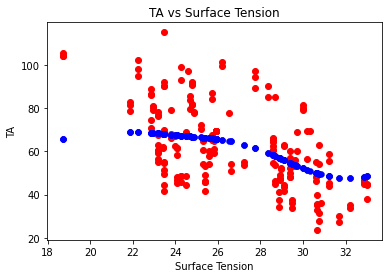

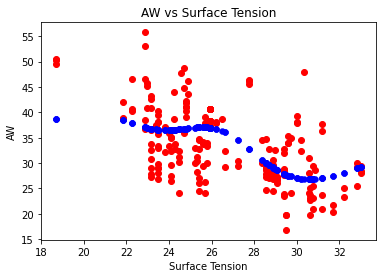

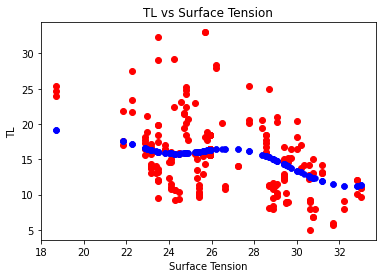

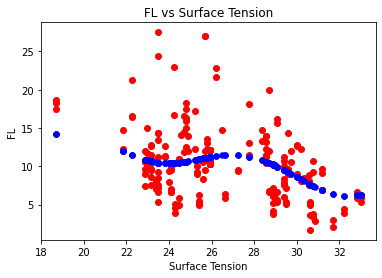

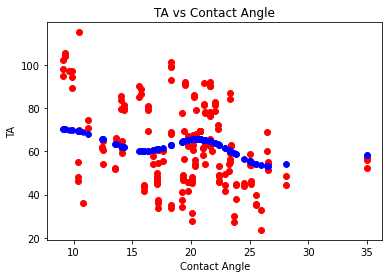

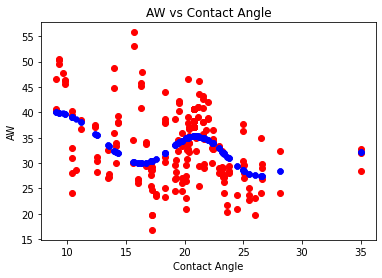

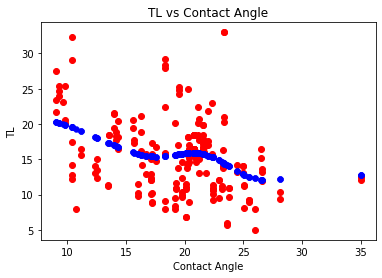

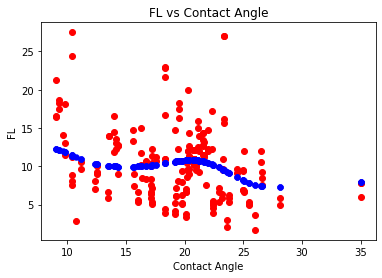

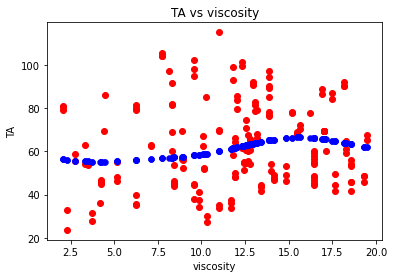

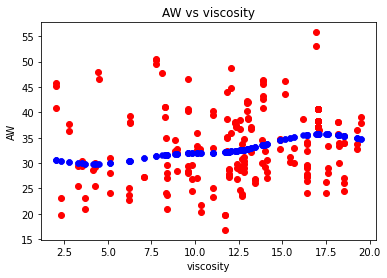

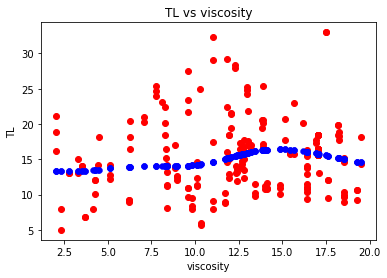

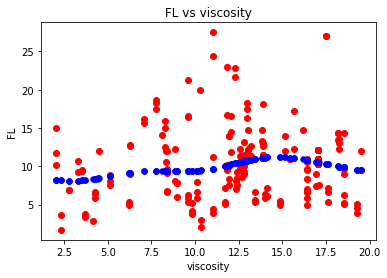

In [97]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
        
        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])


        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train

        
        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue',linewidth=0.4)
        plt.title(y+' vs '+x)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()


        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [98]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,250.319496,12.447015,15.743523,0.209196
1,Surface Tension vs AW,39.029000,4.731917,6.224566,0.251337
2,Surface Tension vs TL,22.596981,3.577935,4.738901,0.162344
3,Surface Tension vs FL,18.638116,3.095984,4.302805,0.145100
4,Contact Angle vs TA,292.714300,13.148477,17.063431,0.070033
5,Contact Angle vs AW,47.761703,5.432032,6.900776,0.077776
6,Contact Angle vs TL,25.723954,3.724278,5.070032,0.035072
7,Contact Angle vs FL,21.122301,3.372032,4.592726,0.023351
8,viscosity vs TA,321.637130,13.822321,17.873012,-0.019955
9,viscosity vs AW,54.591443,5.819827,7.377321,-0.050500


### Random Forest Regression

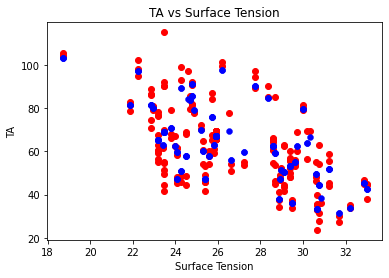

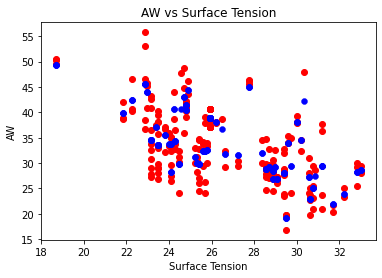

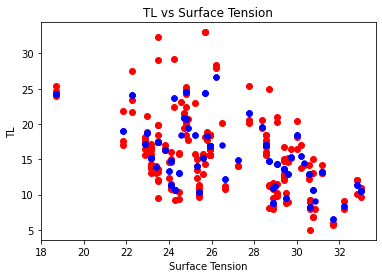

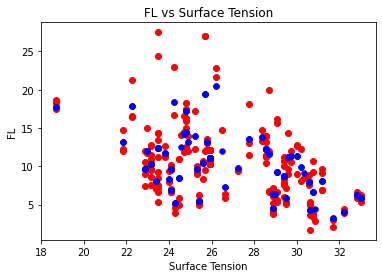

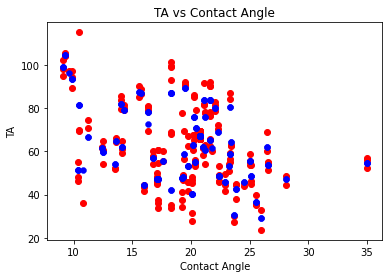

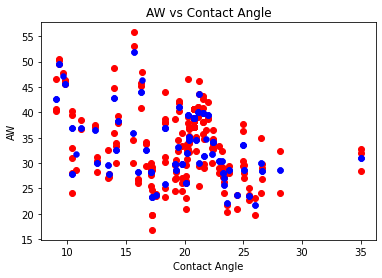

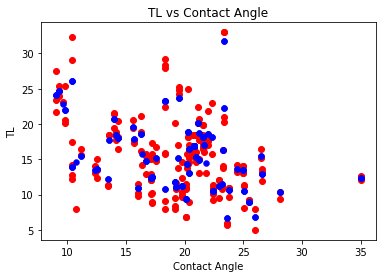

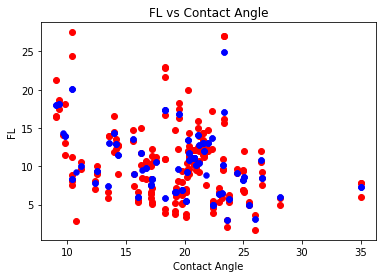

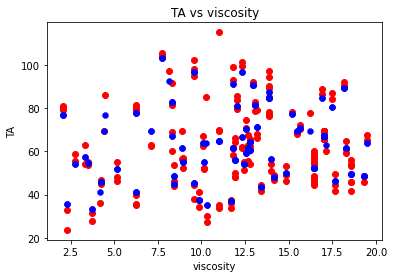

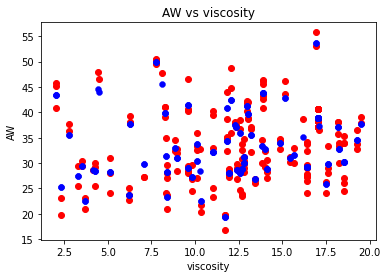

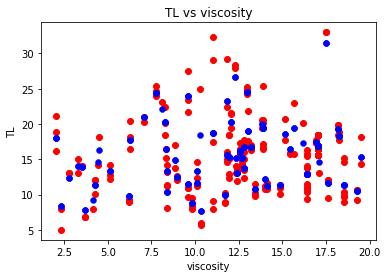

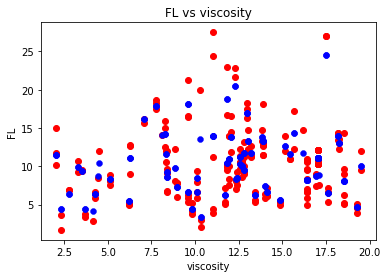

In [99]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        model = RandomForestRegressor(n_estimators=100)
        

        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])

        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train


        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue',linewidth=0.4)
        plt.title(y+' vs '+x)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()
        
        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [100]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,108.304255,7.354441,10.279812,0.661716
1,Surface Tension vs AW,16.931225,3.178666,4.100204,0.671043
2,Surface Tension vs TL,13.722429,2.559136,3.673639,0.492982
3,Surface Tension vs FL,11.777650,2.329300,3.404015,0.457919
4,Contact Angle vs TA,86.147644,6.514181,9.261812,0.724535
5,Contact Angle vs AW,15.437358,2.970992,3.920848,0.702518
6,Contact Angle vs TL,8.014222,2.080530,2.818143,0.701706
7,Contact Angle vs FL,7.256670,1.957623,2.677388,0.667733
8,viscosity vs TA,119.879556,6.985665,10.572440,0.621271
9,viscosity vs AW,15.657347,2.909911,3.915504,0.701077


### Gaussian Process Regression

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimi

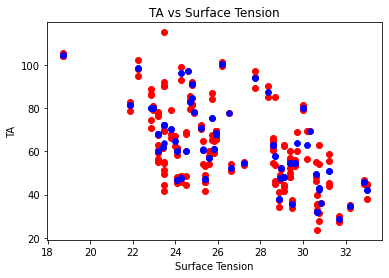

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.lo

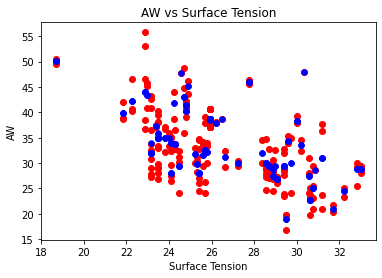

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimi

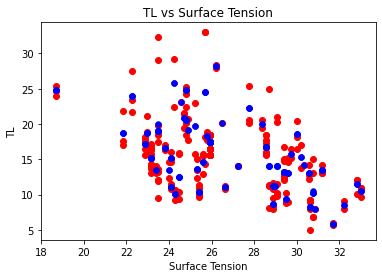

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.lo

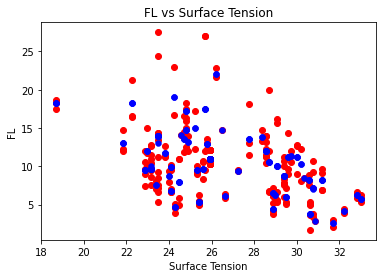

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.lo

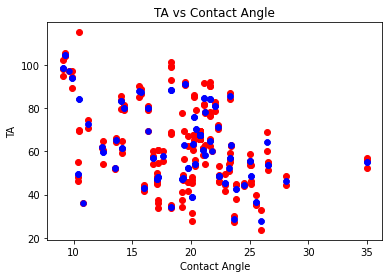

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimi

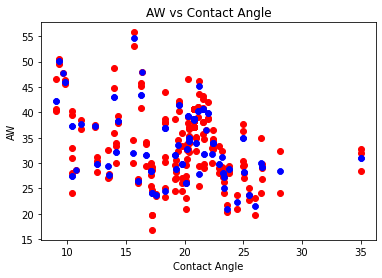

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.lo

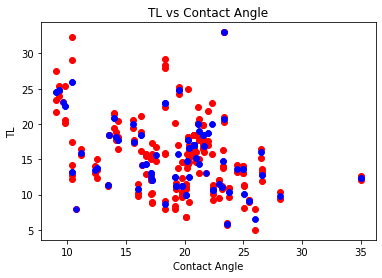

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.lo

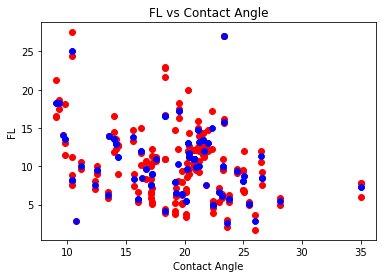

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gau

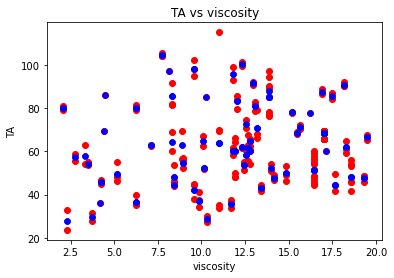

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gau

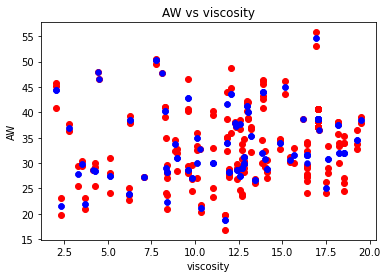

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.lo

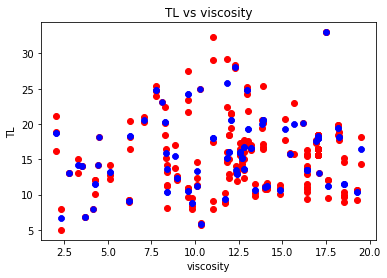

/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/adarsh/.local/lib/python3.10/site-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/adarsh/.lo

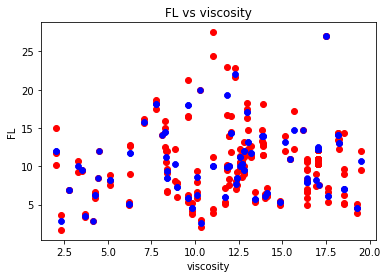

In [101]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        kernel = 1.0 * RBF(length_scale=1.0)
        model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
        
        min_mse = 1e9
        x_train_scat = pd.DataFrame()
        y_train_scat = pd.Series(dtype='float64')
        x_train_plot = pd.Series(dtype='float64')
        y_train_plot = np.array([])


        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            y_pred_train = model.predict(x_train)
            
            mse_scores.append(mean_squared_error(y_test, y_pred))
            mae_scores.append(mean_absolute_error(y_test, y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            r2_scores.append(r2_score(y_test,y_pred))

            if mean_squared_error(y_test, y_pred) < min_mse:
                min_X = X
                x_train_scat = x_train
                y_train_scat = y_train
                x_train_plot = X[train_index]
                y_train_plot = y_pred_train

        
        plt.scatter(x_train_scat,y_train_scat,color='red')
        plt.scatter(x_train_plot,y_train_plot,color='blue',linewidth=0.4)
        plt.title(y+' vs '+x)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.show()

        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)

In [102]:
validation

,Title,mse,mae,rmse,r2
0,Surface Tension vs TA,458.099867,10.383198,19.248889,-0.513712
1,Surface Tension vs AW,122.536134,5.542641,9.906189,-1.299729
2,Surface Tension vs TL,31.747692,3.196448,5.246707,-0.180201
3,Surface Tension vs FL,19.172288,2.672044,4.193144,0.100302
4,Contact Angle vs TA,449.388105,9.989733,18.594817,-0.498783
5,Contact Angle vs AW,118.882281,5.142220,9.611339,-1.227727
6,Contact Angle vs TL,28.234687,2.945657,4.812450,-0.054525
7,Contact Angle vs FL,15.473206,2.332099,3.682379,0.272046
8,viscosity vs TA,396.454211,8.482720,17.600418,-0.319651
9,viscosity vs AW,104.599322,4.598780,9.044222,-0.946279


### Bayesian Regression

In [103]:
validation = pd.DataFrame(columns=['Title','mse','mae','rmse','r2'])

for feature1 in features_input:
    for feature2 in features_output:
        x = feature1
        y = feature2
        X=df[x]
        Y=df[y]
        
        k=5
        kf = KFold(n_splits=k, shuffle=True, random_state=40)
        mse_scores = []
        mae_scores = []
        rmse_scores = []
        r2_scores = []
        
        models_and_traces = []

        for train_index, test_index in kf.split(X):
            
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            x_train = pd.DataFrame(x_train, columns=[x])
            x_test = pd.DataFrame(x_test, columns=[x])
     
            with pm.Model() as model:
                slope = pm.Normal('slope', mu=0, sigma=10)
                intercept = pm.Normal('intercept', mu=0, sigma=10)
                sigma = pm.HalfNormal('sigma', sigma=1)

                mu = slope * x_train + intercept

                likelihood = pm.Normal('y', mu=mu, sigma=sigma, observed=y_train)

                trace = pm.sample(1000, tune=1000)
                y_pred_bayesian = trace['slope'] * x_test + trace['intercept']

            models_and_traces.append((model, trace))

            for i, (model, trace) in enumerate(models_and_traces):
                y_pred = trace['slope'].mean() * x_test + trace['intercept'].mean()
                mse_scores.append(mean_squared_error(y_test, y_pred))
                mae_scores.append(mean_absolute_error(y_test, y_pred))
                rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
                r2_scores.append(r2_score(y_test,y_pred))
            
            mse_scores.append(mean_squared_error(y_test, y_pred_bayesian))
            mae_scores.append(mean_absolute_error(y_test, y_pred_bayesian))
            rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_bayesian)))
            r2_scores.append(r2_score(y_test,y_pred_bayesian))

        
        mse = np.mean(mse_scores)
        mae = np.mean(mae_scores)
        rmse = np.mean(rmse_scores)
        r2 = np.mean(r2_scores)
        
        val = {'Title':[feature1+' vs '+feature2],
                      'mse':[mse],
                      'mae':[mae],
                      'rmse':[rmse],
                      'r2':[r2]}
        val = pd.DataFrame(val)
        validation = pd.concat([validation, val], ignore_index=True)